**Importaciones**

In [1]:
import math
import matplotlib.pyplot as plt
import random
from Clase_Barco import Barco
from Clase_Node import Node
from Clase_Graph import Graph
import time

**Creacion del los barcos**

In [2]:
barco = Barco("Evergiven", 1100, 1100, 5, 25, 25, 0)
barco2 = Barco("Evergiven", 1100, 1100, 1, 4, 4, 0)
barco3 = Barco("Evergiven", 1100, 1100, 1, 2, 2, 0)

**Funcion lectura archivo y creacion del grafo**

In [3]:
def archivos(nombre_archivo, cantidad_nodos, lineas_inicio):
    num_nodes = cantidad_nodos
    graph = Graph(num_nodes)

    nom_nodo="nodo-"
    i=1
    contador=0
    with open(nombre_archivo, "r") as archivo:
        # Ignorar las primeras 6 líneas
        for _ in range(lineas_inicio):
            next(archivo)

        k=0
        lista_coord=[]
        while k<cantidad_nodos:
            linea= archivo.readline()
            lista_coord.append(linea)
            k+=1

        d=archivo.readline()
        z=0
        lista_demanda=[]
        while z<cantidad_nodos:
            linea2= archivo.readline()
            lista_demanda.append(linea2)
            z+=1

        g=archivo.readline()
        l=0
        lista_calaje=[]
        while l<cantidad_nodos:
            linea3= archivo.readline()
            lista_calaje.append(linea3)
            l+=1
        
        for j in range(0,len(lista_coord)):
            partes = lista_coord[j].split()
            numero = int(partes[0])
            x = float(partes[1])
            y = float(partes[2])

            partes2 = lista_demanda[j].split()
            demanda = float(partes2[1])

            partes3 = lista_calaje[j].split()

            calaje = float(partes3[1])
            aux=Node((x,y), demanda, nom_nodo+str(i), calaje)
            graph.add_node(contador, aux)
            i+=1
            contador+=1


    # Agregar las aristas al grafo
    for i in range(0,cantidad_nodos):
        for x in range(i+1,cantidad_nodos):
            graph.add_edge(i,x)

    return graph

**Vecino mas cercano**

In [4]:
def nearest_neighbor(graph, start_node_id, barco):
    visited = [False] * graph.num_nodes
    path = [start_node_id]
    current_node_id = start_node_id
    visited[start_node_id] = True

    while len(path) < graph.num_nodes:
        min_distance = float('inf')
        nearest_neighbor_id = None
        for neighbor_id in range(graph.num_nodes):
            if not visited[neighbor_id] and graph.cost_matrix[current_node_id][neighbor_id] != 0:
                distance = graph.cost_matrix[current_node_id][neighbor_id]
                if distance < min_distance and barco.calado_actual<=graph.node_dict[neighbor_id].draft:
                    
                    min_distance = distance
                    nearest_neighbor_id = neighbor_id

        if nearest_neighbor_id is not None:
            path.append(nearest_neighbor_id)
            barco.actualizar_carga(graph.node_dict[nearest_neighbor_id].demand)
            barco.actualizar_calado()
            visited[nearest_neighbor_id] = True
            current_node_id = nearest_neighbor_id

    path.append(start_node_id)  #Completar el ciclo
    return path


**Visualizacion del camino recorrido**

In [5]:
import matplotlib.pyplot as plt

# Definir la función para graficar el recorrido
def graficar_recorrido(recorrido, grafo):
    # Obtener las coordenadas de los nodos
    coordenadas = [grafo.node_dict[node].coordinates for node in recorrido]
    coordenadas.append(coordenadas[0])  # Agregar la primera coordenada al final para cerrar el ciclo

    # Obtener las etiquetas de las aristas en orden
    etiquetas_aristas = [f'{recorrido[i]}-{recorrido[i+1]}' for i in range(len(recorrido)-1)]
    etiquetas_aristas.append(f'{recorrido[-1]}-{recorrido[0]}')  # Agregar la última arista al final

    # Graficar los nodos
    x = [coord[0] for coord in coordenadas]
    y = [coord[1] for coord in coordenadas]
    plt.scatter(x, y, color='red')

    # Graficar las aristas
    for i in range(len(coordenadas)-1):
        plt.plot([coordenadas[i][0], coordenadas[i+1][0]], [coordenadas[i][1], coordenadas[i+1][1]], color='blue')
        plt.text((coordenadas[i][0] + coordenadas[i+1][0]) / 2, (coordenadas[i][1] + coordenadas[i+1][1]) / 2,
                 etiquetas_aristas[i], color='black')

    # Mostrar el gráfico
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Recorrido del algoritmo')
    plt.show()


**Funcion para ejecucion de vecino mas cercano y toma de tiempo**

In [6]:
def Funcion_instancia(nombre_archivo, num_nodos, skip, barco):
    graph=archivos(nombre_archivo,num_nodos, skip)
    tiempo_inicio = time.time()
    start_node_id = 0  # Nodo inicial 0
    path = nearest_neighbor(graph, start_node_id, barco)
    tiempo_fin = time.time()
    tiempo_total = tiempo_fin-tiempo_inicio

    tiempo_total

    tour=[]
    for i in path:
        tour.append(graph.node_dict[i].name)

    suma=0
    for i in range(0,num_nodos):
        aux=graph.calculate_distance(graph.node_dict[path[i]].coordinates,graph.node_dict[path[i+1]].coordinates)
        suma = suma + aux

    print("Nearest Neighbor Path:", path)
    print("La suma total de las distancias del recorrido es:",suma)

    graficar_recorrido(path, graph)
    return tiempo_total

In [7]:
lista_tiempos=[]

**Instancia de 10 puertos (Realidad nacional)**

Nearest Neighbor Path: [0, 5, 6, 4, 9, 8, 7, 1, 3, 2, 0]
La suma total de las distancias del recorrido es: 70.47324276806793


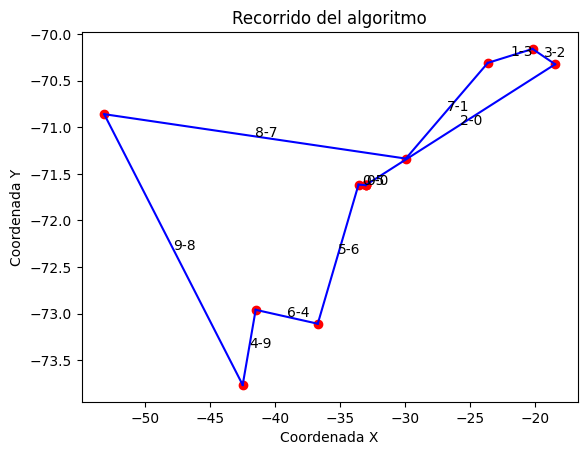

In [8]:
lista_tiempos.append(Funcion_instancia("chile_puertos.tspdl",10, 7, barco3))

**Instancia 14 puertos**

Nearest Neighbor Path: [0, 7, 10, 8, 9, 1, 13, 11, 5, 6, 12, 2, 3, 4, 0]
La suma total de las distancias del recorrido es: 38.68810773852191


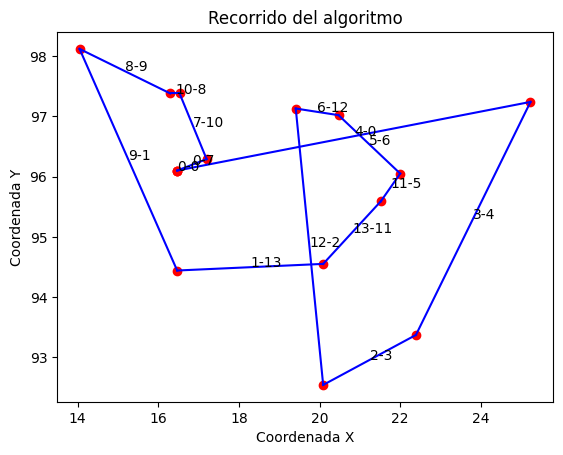

In [9]:
lista_tiempos.append(Funcion_instancia("burma14_50_8.tspdl",14, 8, barco3))

**Instancia 22 puertos**

Nearest Neighbor Path: [0, 7, 15, 21, 3, 17, 16, 1, 2, 12, 11, 13, 14, 5, 6, 18, 19, 20, 9, 8, 4, 10, 0]
La suma total de las distancias del recorrido es: 89.640795601098


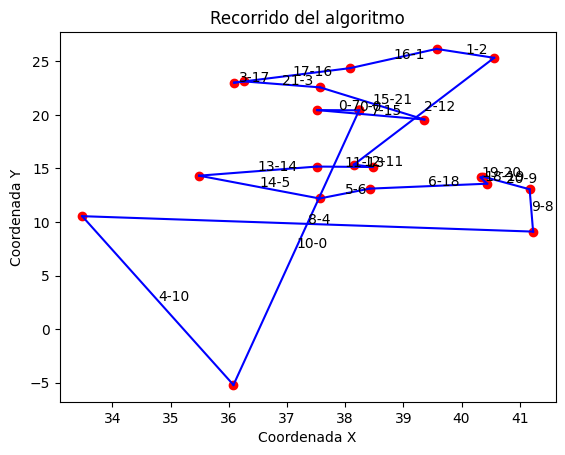

In [10]:
lista_tiempos.append(Funcion_instancia("ulysses22_50_9.tspdl",22, 7, barco2))

**Instancia 100 puertos**

Nearest Neighbor Path: [0, 62, 5, 48, 89, 9, 83, 71, 20, 73, 58, 16, 14, 10, 31, 90, 97, 22, 44, 46, 92, 27, 66, 57, 60, 24, 80, 68, 72, 49, 43, 1, 53, 39, 63, 67, 84, 38, 29, 95, 77, 51, 4, 36, 32, 75, 12, 94, 81, 47, 99, 70, 40, 13, 2, 45, 28, 33, 82, 54, 11, 26, 85, 34, 19, 56, 6, 8, 86, 50, 76, 59, 61, 42, 91, 7, 41, 88, 30, 79, 55, 96, 74, 18, 52, 78, 17, 23, 37, 35, 98, 93, 21, 15, 87, 69, 65, 64, 3, 25, 0]
La suma total de las distancias del recorrido es: 26856.388591241608


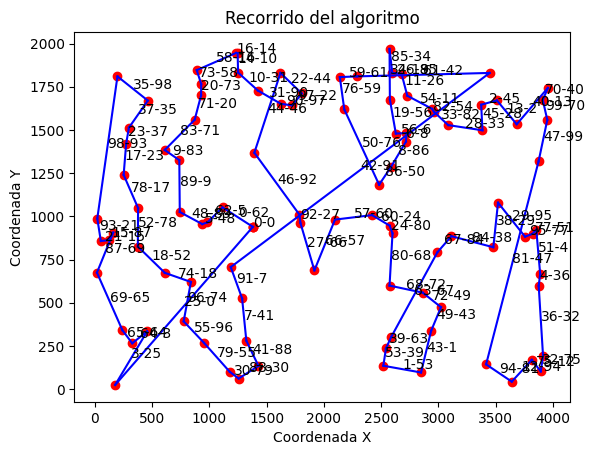

In [11]:
lista_tiempos.append(Funcion_instancia("mio2.tspdl",100, 6, barco))

**Instancia 200 puertos**

Nearest Neighbor Path: [0, 52, 114, 116, 110, 131, 84, 144, 190, 197, 26, 122, 14, 12, 78, 159, 161, 63, 19, 54, 41, 134, 185, 126, 111, 119, 46, 30, 66, 176, 64, 79, 160, 124, 180, 1, 34, 168, 67, 29, 88, 40, 58, 2, 72, 188, 68, 141, 130, 179, 155, 99, 32, 44, 196, 80, 96, 103, 164, 165, 95, 125, 86, 51, 10, 83, 47, 169, 121, 115, 187, 43, 62, 15, 117, 123, 137, 8, 77, 81, 198, 25, 135, 60, 31, 23, 158, 173, 120, 45, 171, 28, 109, 17, 48, 189, 148, 105, 92, 162, 3, 100, 59, 127, 192, 157, 76, 150, 186, 5, 108, 106, 156, 53, 74, 182, 154, 7, 21, 133, 128, 145, 102, 142, 89, 33, 24, 16, 113, 97, 87, 147, 27, 38, 37, 70, 129, 71, 82, 61, 184, 167, 172, 22, 143, 69, 75, 90, 149, 93, 94, 49, 138, 85, 4, 104, 42, 136, 177, 151, 55, 195, 199, 170, 57, 140, 132, 175, 112, 194, 181, 101, 20, 139, 163, 153, 166, 107, 191, 13, 35, 56, 73, 174, 9, 91, 98, 18, 118, 65, 152, 178, 50, 193, 36, 183, 11, 146, 39, 6, 0]
La suma total de las distancias del recorrido es: 35798.40897428191


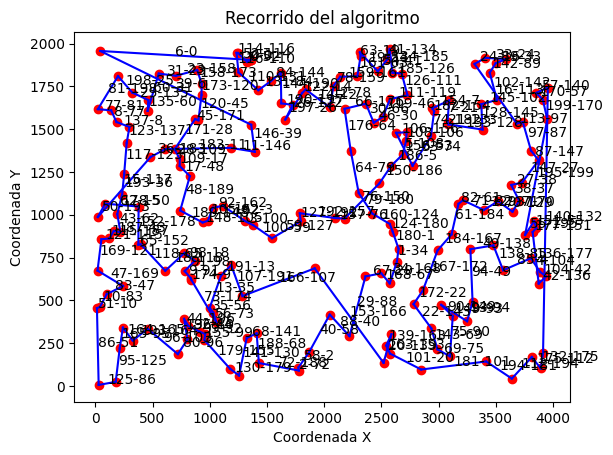

In [12]:
lista_tiempos.append(Funcion_instancia("kroA200_50_9.tspdl",200, 6, barco))

**Instancia 442 puertos**

Nearest Neighbor Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 375, 376, 32, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 377, 87, 88, 89, 90, 91, 92, 93, 94, 378, 95, 379, 96, 97, 382, 383, 112, 124, 134, 147, 159, 170, 183, 198, 209, 219, 225, 410, 409, 413, 236, 264, 419, 267, 415, 263, 262, 235, 261, 260, 259, 258, 257, 256, 255, 254, 253, 252, 251, 250, 249, 414, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 234, 227, 405, 400, 185, 172, 161, 149, 136, 126, 385, 114, 103, 440, 101, 102, 113, 125, 135, 148, 160, 171, 184, 399, 404, 226, 233, 237, 238, 265, 268, 272, 275, 278, 280, 281, 427, 341, 340, 345, 346, 347, 432, 348, 349, 350, 351, 342, 352, 353, 354, 433, 355, 356, 357, 434, 358, 359, 360, 343, 361, 362, 363, 364, 365, 366,

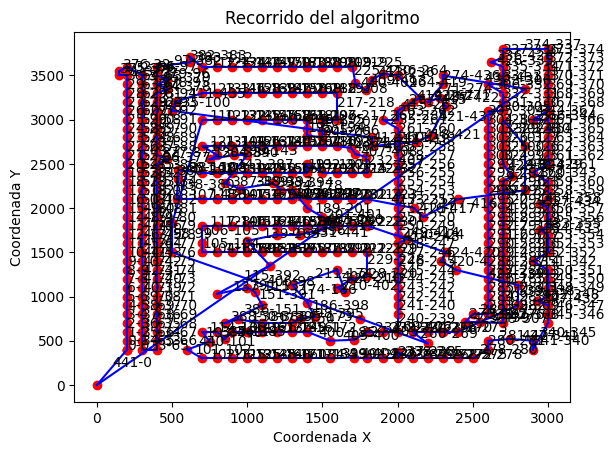

In [13]:
lista_tiempos.append(Funcion_instancia("pcb442_50_10.tspdl",442, 6, barco))

**Grafico de tiempos vs numero de puertos**

Text(0.5, 1.0, 'Tiempo de computo para 5 instancias Python')

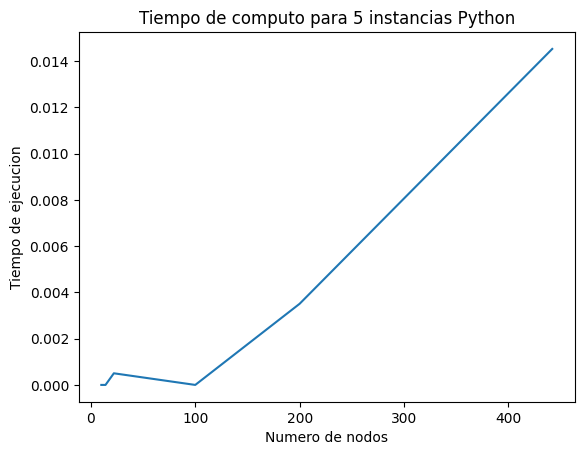

In [14]:
n_nodos=[10,14,22,100,200,442]

plt.plot(n_nodos, lista_tiempos)
plt.xlabel('Numero de nodos')
plt.ylabel('Tiempo de ejecucion')
plt.title('Tiempo de computo para 5 instancias Python')